# Tutorials

In [1]:
from sympy import *
from sympy_equation import Equation, Eqn, solve
init_printing()

Note that:

1. ``Eqn`` is an alias for ``Equation``.
2. the second line of code imports ``solve`` from ``sympy_equation``: this function is aware of objects of type ``Equation``. It is just a wrapper to SymPy's ``solve``.

## Defining equations

In [2]:
var("a:d")
e1 = Eqn(a, b + 1)
e2 =@ c + 1 = d
display(e1, e2)

The above cell created two equations:

* ``e1`` was created by explicitly instanting the ``Equation`` class.
* ``e2`` was created with the short syntax ``=@``. This symbol combination was chosen to avoid conflicts with reserved python symbols while minimizing impacts on syntax highlighting and autoformatting. The short syntax is only available on interactive shells (like IPython, Jupyter Notebook).

## Mathematical operators

Objects of type ``Equation`` supports the following mathematical operations:

In [3]:
e1 + e2

In [4]:
e1 - e2

In [5]:
e1 * e2

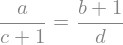

In [6]:
e1 / e2

In [7]:
e1**2

In [8]:
2**e1

In [9]:
e1**e2

## Applying functions to Equation

We can apply mathematical functions (or user defined functions) to an ``Equation`` (or to a particular side) with the following methods:

* ``eq.apply(func, *args, **kwargs)``: apply to both side of the equation, where ``*args, **kwargs`` are additional positional and keyword arguments to the function.
* ``eq.applylhs(func, *args, **kwargs)``: apply to the LHS of the equation.
* ``eq.applyrhs(func, *args, **kwargs)``: apply to the RHS of the equation.

In [10]:
e1

In [11]:
e1.apply(sin)

In [12]:
e1.applylhs(sin)

In [13]:
e1.applyrhs(sin)

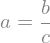

In [14]:
eq3 = Eqn(a, b / c)
eq3

Compute the first cubic root:

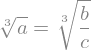

In [15]:
eq3.apply(root, 3)

Compute the second cubic root, only on the RHS:

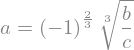

In [16]:
eq3.applyrhs(root, 3, 1)

Compute the third cubic root, only on the LHS:

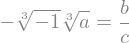

In [17]:
eq3.applylhs(root, 3, 2)

Apply a custom function:

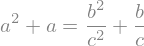

In [18]:
def add_square(expr):
    return expr + expr**2

eq3.apply(add_square)

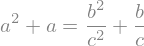

In [19]:
add_square(eq3)

## Expression manipulation

``factor(eq), simplify(eq), collect(eq)`` works on both sides of the ``Equation``. The same is true for ``eq.factor(), eq.simplify(), eq.collect()``.

In [20]:
var("x, y")
eq4 = Eqn(2**(x**2 + 2*x + 1), x * y**2 + 2*y*x)
eq4

In [21]:
eq4.factor()

In [22]:
eq4.factor(deep=True)

In [23]:
simplify(eq4)

In [24]:
eq4.collect(x)

In addition to the ``apply(), applylhs(), applyrhs()`` methods, it is also possible to work directly on a specified side of the equation and perform a complex sequence of manipulations by chaining different methods of the ``Expr`` class. This can be done with the following machinery:

* ``do``: work on both sides of the Equation.
* ``dolhs``: work on the LHS.
* ``dorhs``: work on the RHS.

These are not attributes, in the sense that they don't return anything useful to the user. They are just machinery that allows to work on a particular side. For example:

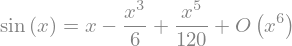

In [25]:
eq5 = Eqn(sin(x), series(sin(x), x, 0))
eq5

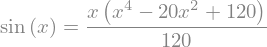

In [26]:
eq5 = eq5.dorhs.removeO().factor()
eq5

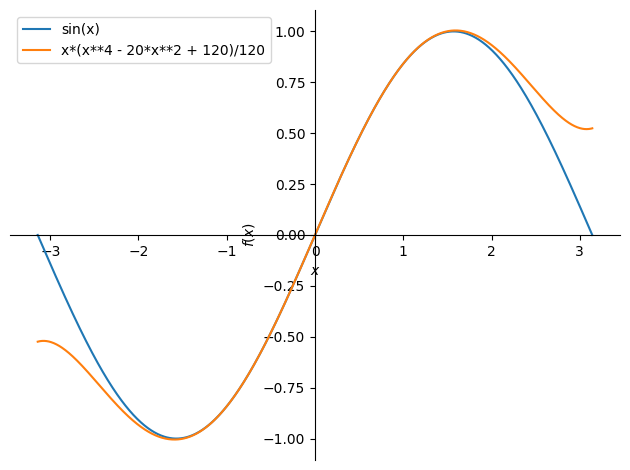

In [27]:
plot(*eq5.args, (x, -pi, pi), legend=True)

## Substitution and numerical evaluation

``Equation.subs()`` is just a wrapper to SymPy's ``Basic.subs()`` in order to make it aware of objects of type ``Equation``.

* ``eq.subs(old, new)``
* ``eq.subs([(old1, new1), (old2, new2), ...])``
* ``eq.subs({old1: new1, old2: new2, ...})``
* ``eq.subs(other_eq)``: here, ``other_eq.lhs`` is the old value to replace, while ``other_eq.rhs`` is the new value to use.
* ``eq.subs(eq2, eq3)``: substitute multiple equations. Here, the order of the arguments is important.

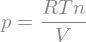

In [28]:
var("p V n R T")
ideal_gas_law = Eqn(p * V, n * R * T)
pressure = ideal_gas_law / V
pressure

In [29]:
var("L atm mol K") # units
d = {R: 0.08206*L*atm/mol/K, T: 273*K, V: 24*L, n: 1*mol}
pressure.subs(d)

In [30]:
pressure.evalf(subs=d, n=3)

An example showing the substitution of an equation into another:

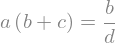

In [31]:
var("a:d")
eq_a = Eqn(a * (b + c), b / d)
eq_b = Eqn(b + c, 3 * d)
display(eq_a, eq_b)

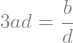

In [32]:
eq_a.subs(eq_b)

## Differentiation and Integration

``diff(eq, *args, **kwargs)`` and ``integrate(eq, *args, **kwargs)`` works on both sides of the ``Equation``. The same is true for ``eq.diff(*args, **kwargs)`` and ``eq.integrate(*args, **kwargs)``.

Use ``eq.applylhs`` or ``eq.applyrhs`` (or ``eq.dolhs, eq.dorhs``) to differentiate only one side of the equation.

In [33]:
e = Eqn(a * x**2 * y + b * x * y**2, x*y - c)
e

In [34]:
e.diff(y)

In [35]:
e.diff(x, 2)

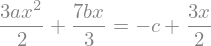

In [36]:
e.integrate((y, 1, 2))

In [37]:
e.applylhs(diff, x)

In [38]:
e.dorhs.diff(y)

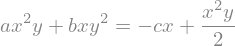

In [39]:
e.dorhs.integrate(x)

## Attributes and Methods

* ``eq.swap``: swap the LHS with RHS.
* ``eq.cross_multiply()``
* ``eq.as_expr()``: convert the ``Equation`` to a symbolic expression by writing ``LHS - RHS``.
* ``eq.as_Boolean()``: convert the ``Equation`` to a SymPy's ``Equality`` (which does not support mathematical operations).
* ``eq.check()``: verify if the LHS is mathematically equivalent to the RHS.

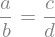

In [40]:
var("a:d")
e = Eqn(a/b, c/d)
e

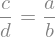

In [41]:
e.swap

In [42]:
e.cross_multiply()

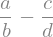

In [43]:
e.as_expr()

<class 'sympy.core.relational.Equality'>


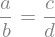

In [44]:
equality = e.as_Boolean()
print(type(equality))
equality

Note that there is nothing stopping us from writing "wrong" equations. For example:

In [45]:
f = Eqn(0, 1)
f

To verify if the two sides are mathematically equivalent let's execute:

In [46]:
f.check()

If the equivalence can't be determited, an object of type ``Equality`` will be returned:

<class 'sympy.core.relational.Equality'>


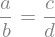

In [47]:
res = e.check()
print(type(res))
res

## Solving equations

If one or more objects of type ``Equation`` are provided to ``solve()``, then the output will contains object of the same type:

In [48]:
e = Eqn(a*x**2, -b*c - c)
e

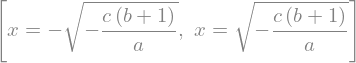

In [49]:
solve(e, x)

Differently, if equations are converted to expressions, than ``solve()`` will behave exactly like SymPy's ``solve()``:

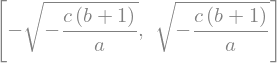

In [50]:
solve(e.as_expr(), x)

Solving multiple equations:

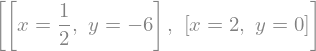

In [51]:
e1 = Eqn(x**2 * y, -2 + x)
e2 = Eqn(y**2 * x, -3 * y)
solve([e1, e2], [x, y])

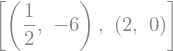

In [52]:
solve([e.as_expr() for e in [e1, e2]], [x, y])

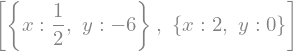

In [53]:
solve([e.as_expr() for e in [e1, e2]], [x, y], dict=True)

## Configuration options

``equation_config`` is an object containing a few properties to customize the behaviour of the module:

In [54]:
from sympy_equation import equation_config

Arguably the most useful options are :

* ``equation_config.show_label``
* ``equation_config.integers_as_exact``

### Hide/Show the equation label

By default, the equation's label will be hidden:

In [55]:
equation_config.show_label

False

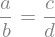

In [56]:
var("a:d")
e = Eqn(a / b, c / d)
e

When it's True, a label with the name of the equation in the python environment will be shown on the screen.

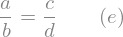

In [57]:
equation_config.show_label = True
e

### Integer as exact

When it's True and we are running in an IPython/Jupyter environment, it preparses the content of a code line in order to convert integer numbers to sympy's Integer. In doing so, we can write 2/3, which will be converted to Integer(2)/Integer(3), which then SymPy converts to Rational(2, 3). If False, no preparsing is done, and Python evaluates 2/3 to 0.6666667, which will then be converted by SymPy to a Float.

In [58]:
equation_config.integers_as_exact

False

In [59]:
e = Eqn(a + 1 /2, b + 3 / 4)
e

In [60]:
equation_config.integers_as_exact = True

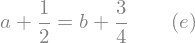

In [61]:
e = Eqn(a + 1 /2, b + 3 / 4)
e

It is reccommended to set this options to ``True`` only when executing purely symbolic computations, not when using other numerical
libraries, such as Numpy, because it will create hard to debug situations. Consider executing this: ``np.cos(np.pi / 4)``.
If ``integers_as_exact = True``, this will raise an error because 4 is first replaced with sympy's Integer(4), then
``np.pi / Integer(4)`` becomes a symbolic expression and ``np.cos`` is unable to evaluate it.

In [62]:
import numpy as np
np.cos(np.pi / 4)

TypeError: loop of ufunc does not support argument 0 of type Float which has no callable cos method

## Example 1

Given the equations of the volume and mass of a cylindrical pressure vessel, rewrite the mass in terms of the volume and the ratio $L/D$.

Parameters:
* V: volume;
* M: mass;
* D: diameter;
* p: pressure inside the vessel;
* sigma: stress level on the thin walls;
* rho: density of the material.

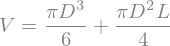

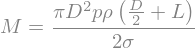

In [63]:
equation_config.show_label = False
var("D, L, V, M, rho, p, sigma")
Veq = Eqn(V, pi * D**3 / 6 + pi * D**2 * L / 4)
Meq = Eqn(M, pi * D**2 * rho * p / (2 * sigma) * (L + D / 2))
display(Veq, Meq)

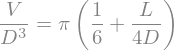

In [64]:
Veq = (Veq / D**3).expand().collect(pi)
Veq

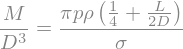

In [65]:
Meq = (Meq / D**3).expand().collect(pi * rho * p / sigma)
Meq

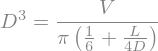

In [66]:
# isolate D**3
Veq = 1 / Veq * V
Veq

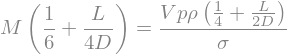

In [67]:
eq = Meq.subs(Veq).cross_multiply() / (pi * sigma)
eq

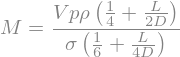

In [68]:
res = eq / eq.lhs * M
res

## Example 2

Compute the angle $\alpha$ as a function of the angles $\beta, \gamma$.

In [69]:
a, b, g = symbols("alpha beta gamma")
e = Eqn(sin(a) * cos(b), cos(a) * sin(b) * cos(g))
e

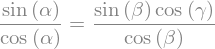

In [70]:
e = e / cos(a) / cos(b)
e

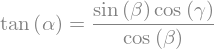

In [71]:
e = e.dolhs.simplify()
e

Assuming $-\pi / 2 < \alpha < \pi / 2$:

In [72]:
e = e.applylhs(lambda t: t.args[0]).applyrhs(lambda t: atan2(*fraction(t)))
e